<a href="https://colab.research.google.com/github/nonotnoah/minion-recognizer/blob/main/minion_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prereqs

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 720 kB 8.5 MB/s 
     |████████████████████████████████| 1.2 MB 47.8 MB/s 
     |████████████████████████████████| 188 kB 65.8 MB/s 
     |████████████████████████████████| 46 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 51 kB 372 kB/s 
Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = Path('/content/drive/MyDrive/minions')

In [ ]:
fns = get_image_files(path)
fns

(#120) [Path('/content/drive/MyDrive/minions/melee/red melee/red_melee9.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee8.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee4.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee6.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee5.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee3.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee7.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee24.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee25.jpg'),Path('/content/drive/MyDrive/minions/melee/red melee/red_melee23.jpg')...]

In [ ]:
minions = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)
)

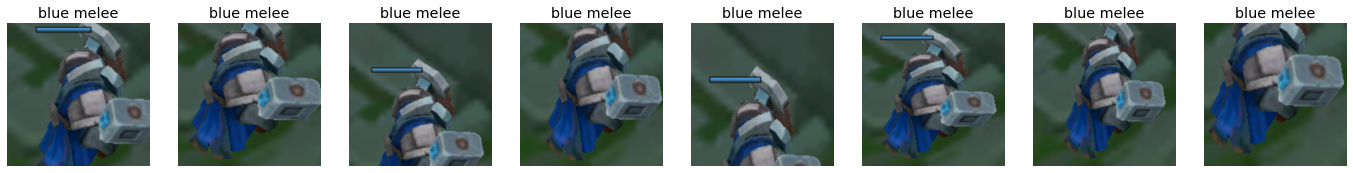

In [ ]:
minions = minions.new(item_tfms=RandomResizedCrop(224, min_scale=0.3))
dls = minions.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,3.135244,5.888685,0.916667,00:01


epoch,train_loss,valid_loss,error_rate,time
0,2.609923,4.582352,0.916667,00:01
1,2.629144,3.302035,0.875000,00:01
2,2.322868,2.041339,0.791667,00:01
3,2.070356,1.186055,0.500000,00:01
4,1.762737,0.781671,0.291667,00:01
5,1.523573,0.590989,0.208333,00:01


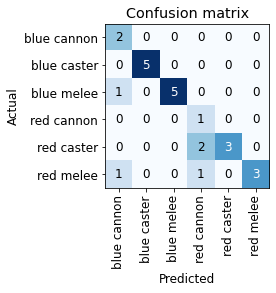

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

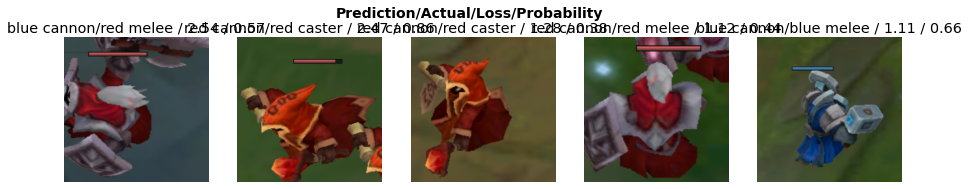

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn.path = Path('/content/drive/MyDrive/minions')
learn.export()

In [ ]:
model_export = load_learner(path/'export.pkl')

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
what,_,probs = model_export.predict(img)
print(f"It's a {what} minion!")
print(f"Probability it's a {what}: {probs[1].item():.6f}")

It's a red melee minion!
Probability it's a red melee: 0.168474


In [ ]:
model_export.dls.vocab

['blue cannon', 'blue caster', 'blue melee', 'red cannon', 'red caster', 'red melee']